$Introduccion$


En esta primera parte, trabajaremos con los datos de Blanton et al. (2001) y sobre una funcion de ajuste de luminosidad de las galaxias que depende de tres parametros principales: $M^*, \phi^*, \alpha$.
Determinaremos un rango para los parametros en donde lo creemos 'aceptable'. El objetivo final de esta primera parte es usar las Cadenas de Markov en esos intervalos.
Las cadenas de Markov son una herramienta de estadistica para obtener los valores mas optimos de unos parametros a traves de la iteracion, luego haremos un histograma de estas iteraciones obtenidas.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import pandas as pd
import functools
from scipy.stats import norm
from random import random

In [2]:
data2 = pd.read_csv('puntosguia4.csv',sep = ';', decimal = ',', names = ['X', 'Y' ])
dataYsup = pd.read_csv('errores superiores.csv',sep = ';', decimal = ',', names = ['X', 'datasup'])
dataYinf = pd.read_csv('errores inferiores.csv',sep = ';', decimal = ',', names = ['X', 'datainf'])

In [3]:
# data2 

In [4]:
data2Ysup = dataYsup.sort_values('X')
data2Yinf = dataYinf.sort_values('X')
# este codigo es porque se habian mezclado algunos valores y no estaban ordenados, en el grafico del error
# no iba a dar correctamente

In [5]:
len(data2)

47

Si quiero obtener las barras de error, los data2Ysup e data2Yinf me dan los valores donde terminan las barras de error, no su ancho, por lo tanto en el caso del error Y superior debo hacer: data2Ysup - data2 e insertar esos valores en una lista, al reves para el error Y inferior.

In [6]:
# Los paso a un array
data = np.array(data2)
Ysup = np.array(data2Ysup)
Yinf = np.array(data2Yinf)

In [7]:
errYsup = []
errYinf = []
for i in range(len(data)):
    x = Ysup[i][1] - data[i][1]
    y = data[i][1] - Yinf[i][1]
    errYsup.append(x)
    errYinf.append(y)


In [8]:
# errYsup?
# errYinf?

Text(0, 0.5, 'Phi')

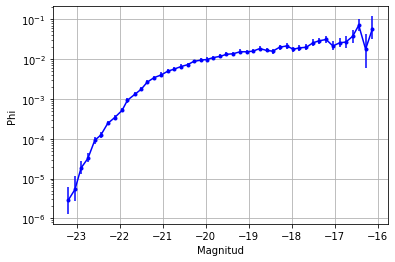

In [9]:
plt.plot(data2['X'], data2['Y'], c = 'blue')
plt.errorbar(data2['X'], data2['Y'], fmt = '.', yerr= (errYinf, errYsup), c = 'blue')
# yerr interpreta como las longitudes de las barras de error, primero van las de error inferior y luego la superior
plt.yscale('log')
plt.grid()
plt.xlabel('Magnitud')
plt.ylabel('Phi')

Quiero ajustar los puntos, para eso utilizamos la funcion de Schechter:
$\Phi(M) = 0.4 * ln(10) * \Phi^* * 10^{-0.4(M-M^*)(\alpha + 1)} * exp (-10^{-0.4 * (M - M^*)})$

Esta formula esta corregida respecto a la que se presenta en la guia, para que funcione el ajuste.

In [10]:
# Por si queremos usar los datos de magnitud y phi por separado
dataX = []
dataY = []
for i in range(len(data)):
    dataX.append(data[i][0])
    dataY.append(data[i][1])
# Pero trabajar con data2['X'] y data2['Y'] funciona bien igual

In [11]:
def Schechter(phi_est, M, alpha, M_est):
#     M son los valores de magnitud
#  phi_est, M_est y alpha son los parametros
    Funcion = []
    M0 = np.array(M)
    for i in range(len(M)):
        a = (-0.4) * (M0[i]-M_est) * (alpha+1) 
        b = (-0.4) * (M0[i]-M_est)
        
        phi = 0.4 * np.log(10) * (phi_est) * (10**a) * np.exp(-10**b)
        
        Funcion.append(phi)
    
    return(Funcion)

In [12]:
y = Schechter(1.46E-2, data2['X'], -1.20, -20.83)

In [13]:
# y
# Es una lista, para el plot debo pasarlo a un array

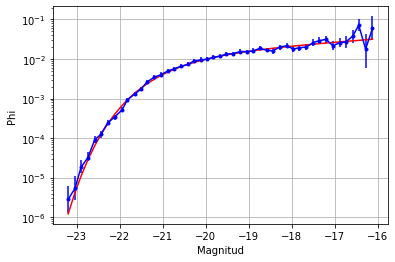

In [14]:
# Vemos el plot de los puntos con su error y el ajuste
plt.plot(data2['X'], np.array(y), color = 'red')
plt.plot(data2['X'], data2['Y'], c = 'blue')
plt.errorbar(data2['X'], data2['Y'], fmt = '.', yerr= (errYinf, errYsup), c = 'blue')
plt.yscale('log')
plt.grid()
plt.ylabel('Phi')
plt.xlabel('Magnitud')
plt.show()

Quiero calcular el Likelihood, obtengo primero la varianza:

In [15]:
for i in range (len(data)):
    s = (np.array(errYsup) + np.array(errYinf)) * 0.5
#     multiplicar es mas facil para las computadoras que dividir

In [16]:
# s?

In [17]:
len(s)

47

In [18]:
def likelihood(phi, phi_est, M, M_est, alpha, sig):
#    phi son los datos de phi, seria yd

    phi_model = Schechter(phi_est, M, alpha, M_est)

    p = st.norm(loc = phi_model, scale = sig).pdf(phi)
#     p es la probabilidad del dato en una gaussiana centrada en phi_model con varianza s 
#     print(p)
    l = p.prod() 
    return(l)

In [19]:
likelihood(phi = data2['Y'], phi_est = 1.46E-2, M = data2['X'], M_est = -20.83, alpha = -1.20, sig = s)

4.529213225610751e+121

Para los priors, modifico los parametros para ver como afecta al grafico del modelo y determinar asi un intervalo
para cada parametro.

In [20]:
y = Schechter(phi_est = 1.46E-2 , M = data2['X'], alpha = -1.2, M_est = -20.83)
# Variamos phi*
y2 = Schechter(phi_est = 0.0004 , M = data2['X'], alpha = -1.2, M_est = -20.83)
y3 = Schechter(phi_est = 0.04 , M = data2['X'], alpha = -1.2, M_est = -20.83)
# Variamos alpha
y4 =  Schechter(phi_est = 1.46E-2 , M = data2['X'], alpha = -1.9, M_est = -20.83)
y5 =  Schechter(phi_est = 1.46E-2 , M = data2['X'], alpha = -0.0001, M_est = -20.83)
# Variamos M*
y6 =  Schechter(phi_est = 1.46E-2 , M = data2['X'], alpha = -1.2, M_est = -21.9)
y7 =  Schechter(phi_est = 1.46E-2 , M = data2['X'], alpha = -1.2, M_est = -19.1)

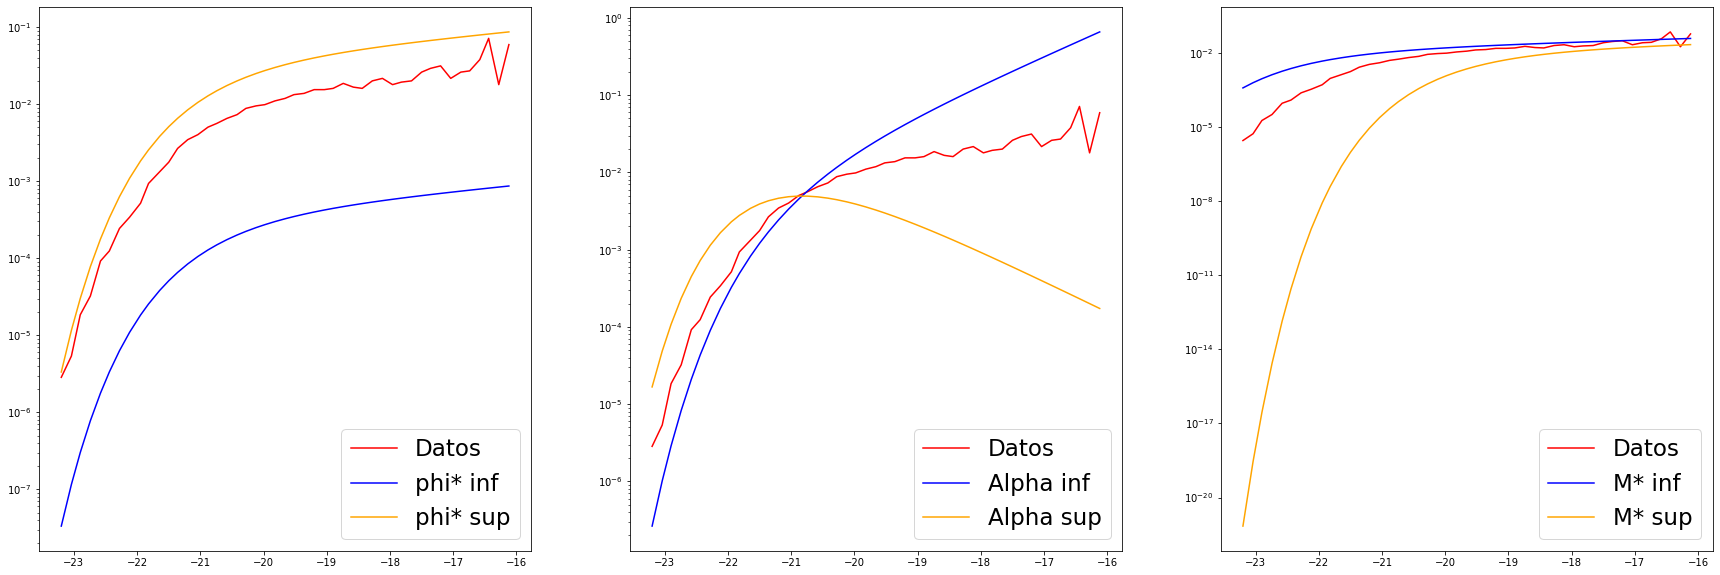

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30,10))

# plot de phi*
ax1.plot(data2['X'], data2['Y'], c = 'red', label = 'Datos')
ax1.plot(data2['X'], np.array(y2), color = 'blue', label = 'phi* inf')
ax1.plot(data2['X'], np.array(y3), color = 'orange', label = 'phi* sup')
ax1.legend(loc = 'lower right', fontsize = 23)
ax1.set_yscale('log')

# plot de alpha
ax2.plot(data2['X'], data2['Y'], c = 'red', label = 'Datos')
ax2.plot(data2['X'], np.array(y4), color = 'blue', label = 'Alpha inf')
ax2.plot(data2['X'], np.array(y5), color = 'orange', label = 'Alpha sup')
ax2.legend(loc = 'lower right', fontsize = 23)
ax2.set_yscale('log')

# plot de M*
ax3.plot(data2['X'], data2['Y'], c = 'red', label = 'Datos')
ax3.plot(data2['X'], np.array(y6), color = 'blue', label = 'M* inf')
ax3.plot(data2['X'], np.array(y7), color = 'orange', label = 'M* sup')
ax3.legend(loc = 'lower right', fontsize = 23)
ax3.set_yscale('log')

Ahora defino mi funcion prior:

In [22]:
def prior(phi, a, M, phi_inf = 0.0004, phi_sup = 0.04, a_inf = -1.9, a_sup = -0.0001, M_inf = -21.9, M_sup = -19.7):
    delta_phi = phi_sup - phi_inf
    delta_alpha = a_sup -a_inf
    delta_M = M_sup - M_inf
#     recordar que deben ser positivos los scale, o arreglarlo con abs()
    f = st.uniform(loc = [ phi_inf, a_inf, M_inf], scale = [delta_phi, delta_alpha, delta_M])
    p = f.pdf([phi, a, M]).prod()
#     esto porque debemos hacer el producto de los 1 / scale(i), que me da el volumen
# los _inf y _sup son los limites inferiores y superiores de los parametros, el uniform se centra en el _inf, 
# con scale = amplitud del intervalo de cada parametro
# phi, a y M son los valores que queremos probar si se encuentran dentro del cubo de parametros
    return(p)


In [23]:
prior(phi = 1.1E-2,a = -1.9,M = -21.9)

6.041591962382053

Para probar si mi funcion prior anda bien, hago un intervalo ancho para cada parametro donde incluyo valores adentro y afuera del intervalo, con un for evaluo cada punto, y luego hago el plot.
Mantengo 2 parametros fijos y hago variar uno solo a la vez.

In [24]:
phi1 = np.linspace(0., 6.0E-2, 200)
a1 = np.linspace(-1.35, -1, 200)
M1 = np.linspace(-22, -18, 200)

In [25]:
X1 = []
X2 = []
X3 = []
for i in range(len(phi1)):
    x1 = prior(phi1[i], a = -1.2, M = -21)
    X1.append(x1)
   
    x2 = prior(1.1E-2, a1[i], M = -21)
    X2.append(x2)
    
    x3 = prior(1.1E-2, -1.2, M1[i])
    X3.append(x3)

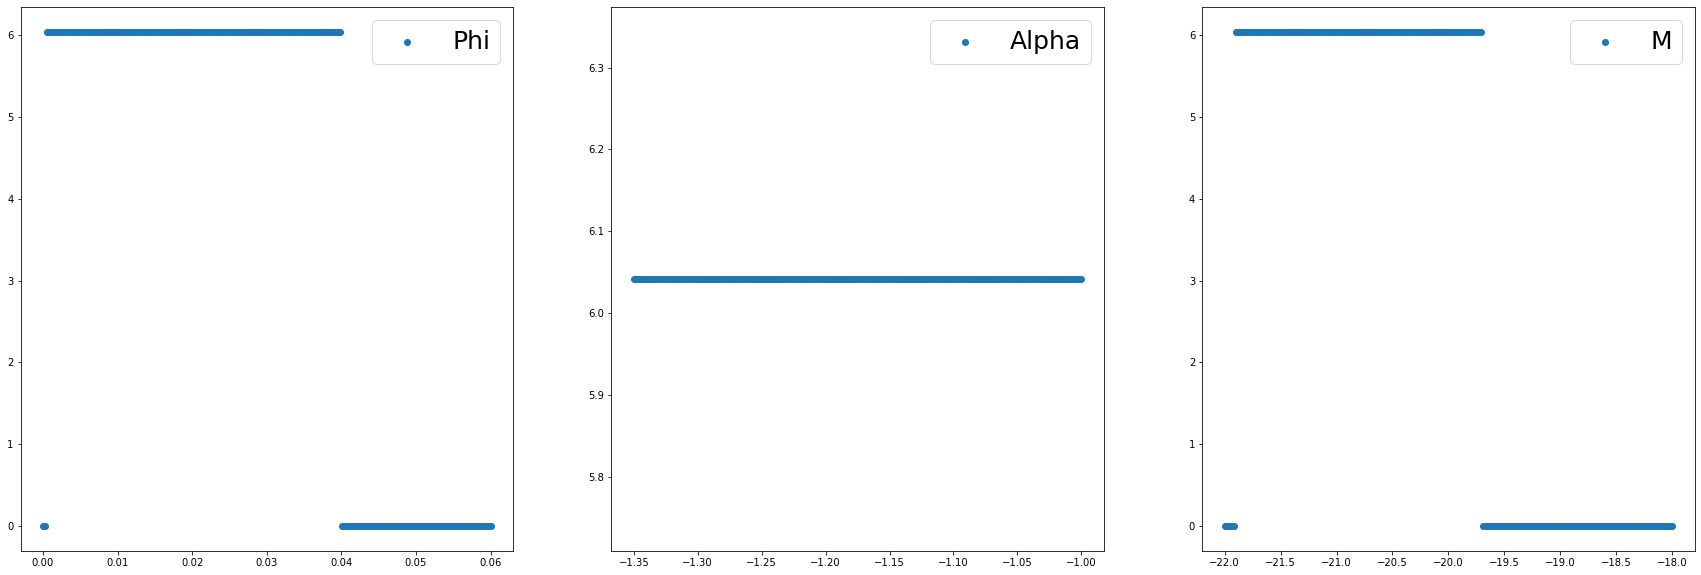

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30,10))
ax1.scatter(phi1, np.array(X1), label = 'Phi')
ax1.legend(loc = 'upper right', fontsize = 25)

ax2.scatter(a1, np.array(X2), label = 'Alpha')
ax2.legend(loc = 'upper right', fontsize = 25)

ax3.scatter(M1, np.array(X3), label = 'M')
ax3.legend(loc = 'upper right', fontsize = 25)

In [27]:
phi_inf = 0.0004
phi_sup = 0.04
a_inf = -1.9
a_sup = -0.0001
M_inf = -21.9
M_sup = -19.1
delta_phi = phi_sup - phi_inf
delta_alpha = a_sup -a_inf
delta_M = M_sup - M_inf

In [28]:
# definimos la proposal funcion:
def proposal(mu_phi, mu_a, mu_M): 

    proposal1 = functools.partial(norm, scale = 0.001)
    mu_phi_cand = proposal1(mu_phi).rvs()
   
    proposal2 = functools.partial(norm, scale = 0.01)
    mu_a_cand = proposal2(mu_a).rvs()
    
    proposal3 = functools.partial(norm, scale = 0.1)
    mu_M_cand = proposal3(mu_M).rvs()
    
    results = [mu_phi_cand, mu_a_cand, mu_M_cand]
    
    return (results)

In [29]:
proposal(mu_phi = 1.1E-2, mu_a = -1.2, mu_M = -21)
# me tira valores random en un distribucion gaussiana de mis parametros, segun el mu que yo le meta

[0.01057933038928833, -1.2048323519336284, -20.898852050774863]

Vemos la funcion posterior:

In [30]:
def posterior(phi_prop, M_prop, a_prop):
    L = likelihood(phi = data2['Y'], M = data2['X'], phi_est = phi_prop, M_est = M_prop, alpha = a_prop, sig = s)
    P = prior(phi = phi_prop, a = a_prop, M = M_prop)
    posterior = L * P
    return(posterior)

In [31]:
posterior(phi_prop = 1.1E-2, M_prop = -20.6, a_prop = -1.2)
# usando los valores de los parametros de Blanton

5.54385857107764e+36

In [32]:
# Defino f como:
f = st.uniform(loc = [ phi_inf, M_inf, a_inf], scale = [delta_phi, delta_M, delta_alpha])
f.rvs()
# me va dar valores random dentro del cubo de parametros, esto para empezar la cadena

array([  0.03580493, -20.84952454,  -1.71710627])

In [33]:
post = 0
while post < 1.e-8:
      pars = f.rvs()
#  doy unos valores de parametros iniciales para la funcion posterior
      post = posterior(pars[0], pars[1], pars[2])
cadena = []
# si mi posterior es muy chiquito (el numero se puede cambiar), entonces para no irme muy en el extremo de mi 
# distribucion lo sorteo nuevamente, asi no me da cero la posterior
for i in range(10000):
    salto = proposal(0,0,0)
#     hacemos que el salto sea la funcion proposal, centrada en 0
    pars_new = pars + salto
    post_new = posterior(pars_new[0],pars_new[1],pars_new [2])
#     calculo la probabilidad posterior en el punto nuevo
    prob_aceptacion = min(1, post_new / post)
    u = random()
#     sorteo un numero entre 0 y 1
    acepto = u < prob_aceptacion
#     vemos que si prob_aceptacion me da muy cercana a cero, acepto es falsa, esto es tambien para evitar las
#     probabilidades posteriores bajas y si me da mayor a posterior, entonces tengo 1 y siempre es verdadera,
#     porque siempre quiero tener mayores probabilidades, no busco el maximo, me basta uno de mayor probabilidad
    if acepto:
        pars = pars_new 
    #         si acepto los nuevos parametros hago que sean los nuevos pars para añadirlos a la cadena
#         y repetir el loop
#     si no lo acepto, mis pars vuelven a ser los viejos pars y repito el loop
        post = post_new

    cadena.append(pars)

In [34]:
# cadena?

In [35]:
n = []
for i in range(len(cadena)):
    n.append(i+1)

In [36]:
cad = np.array(cadena)
cad_phi = []
cad_a = []
cad_M = []
for i in range(len(cadena)):
    cad_phi.append(cad[i][0])
    cad_M.append(cad[i][1])
    cad_a.append(cad[i][2])

Text(0, 0.5, 'Alpha')

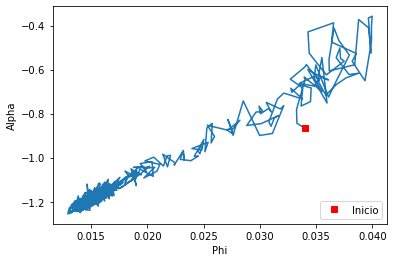

In [37]:
plt.plot(cad_phi, cad_a)
plt.plot(cad_phi[0], cad_a[0], 's', color = 'red', label = 'Inicio')
plt.legend(loc = 'lower right')
plt.xlabel('Phi')
plt.ylabel('Alpha')

Text(0, 0.5, 'Magnitud')

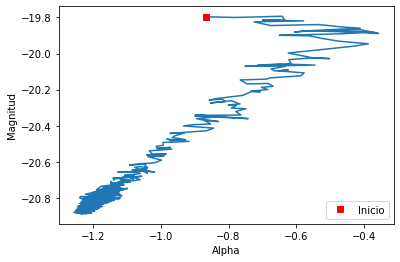

In [38]:
plt.plot(cad_a, cad_M)
plt.plot(cad_a[0], cad_M[0], 's', color = 'red', label = 'Inicio')
plt.legend(loc = 'lower right')
plt.xlabel('Alpha')
plt.ylabel('Magnitud')

Text(0, 0.5, 'Magnitud')

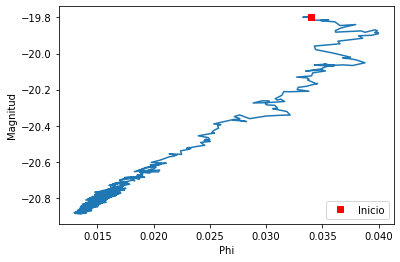

In [39]:
plt.plot(cad_phi, cad_M)
plt.plot(cad_phi[0], cad_M[0], 's', color = 'red', label = 'Inicio')
plt.legend(loc = 'lower right')
plt.xlabel('Phi')
plt.ylabel('Magnitud')

Text(0, 0.5, 'Valor del parametro Phi')

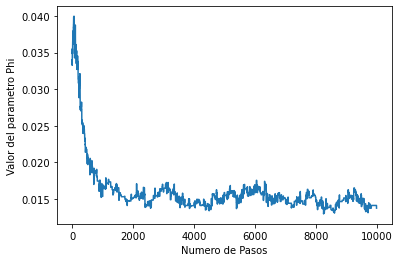

In [40]:
plt.plot(cad_phi)
plt.xlabel('Numero de Pasos')
plt.ylabel('Valor del parametro Phi')

Text(0, 0.5, 'Valor del parametro M')

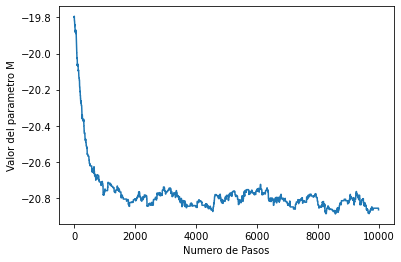

In [41]:
plt.plot(cad_M)
plt.xlabel('Numero de Pasos')
plt.ylabel('Valor del parametro M')

Text(0, 0.5, 'Valor del parametro alpha')

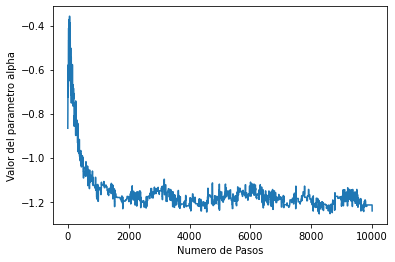

In [42]:
plt.plot(cad_a)
plt.xlabel('Numero de Pasos')
plt.ylabel('Valor del parametro alpha')

Vemos que las cadenas parecen converger a valores proximos a los determinados por Blanton

Veo de hacer un histograma para cada parametro:

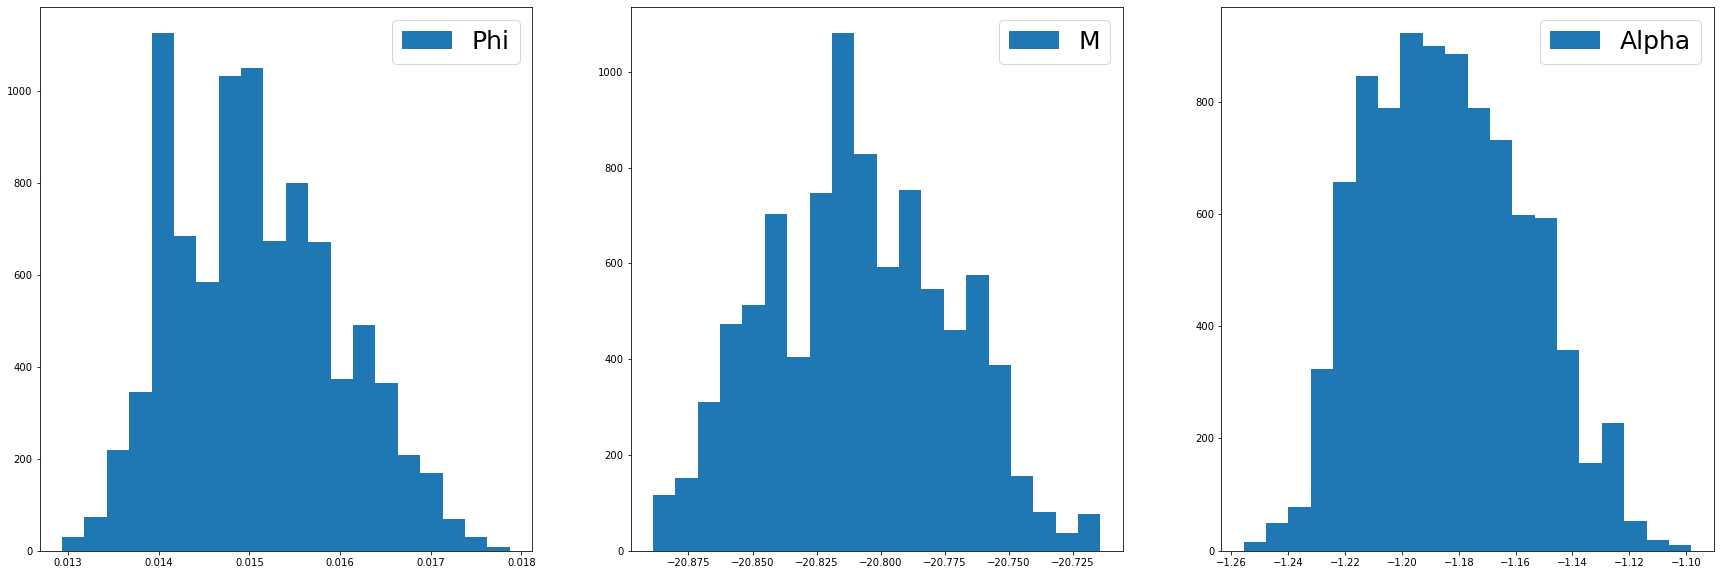

In [78]:
burnt = 1000
# eliminamos la parte del quemado para el histograma
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (30,10))
ax1.hist(cad_phi[burnt:], bins = 20, label = 'Phi')
ax1.legend(loc = 'upper right', fontsize = 25)

ax2.hist(cad_M[burnt:], bins = 20, label = 'M')
ax2.legend(loc = 'upper right', fontsize = 25)

ax3.hist(cad_a[burnt:], bins = 20, label = 'Alpha')
ax3.legend(loc = 'upper right', fontsize = 25)
# En orden de izquierda  a derecha: Phi, M, alpha

Hago varias iteraciones de las cadenas:

In [44]:
Cadenas = []
for k in range(5):
    post = 0
    while post < 1.e-8:
            pars = f.rvs()
            post = posterior(pars[0], pars[1], pars[2])
    cadena = []

    for i in range(10000):
            salto = proposal(0,0,0)
            pars_new = pars + salto
            post_new = posterior(pars_new[0],pars_new[1],pars_new [2])
            prob_aceptacion = min(1, post_new / post)
            u = random()
            acepto = u < prob_aceptacion
            if acepto:
                pars = pars_new
                post = post_new
            cadena.append(pars)   
            
    Cadenas.append(cadena)

In [76]:
burnt = 1000
# Haho saltar la primera parte que es el quemado, no los tomo a todos
Cads = np.array(Cadenas)
cads_phi = []
cads_M = []
cads_a = []
for k in range(len(Cadenas)):
    for i in range(burnt, len(cadena)):
        cads_phi.append(Cads[k][i][0])
        cads_M.append(Cads[k][i][1])
        cads_a.append(Cads[k][i][2])

In [77]:
# Calculo el valor medio de los parametros obtenidos con las cadenas
a1 = np.mean(np.array(cads_phi))
a2 = np.mean(np.array(cads_M))
a3 = np.mean(np.array(cads_a))
print ('El valor medio del parametro phi es:', a1)
print( 'El valor medio del parametro M es', a2)
print ('El valor medio del parametro alpha es', a3)

El valor medio del parametro phi es: 0.014958049023443444
El valor medio del parametro M es -20.816166859367776
El valor medio del parametro alpha es -1.1878114118728882


Vemos que a traves de la iteracion de varias Cadenas de Makov podemos obtener con una media de estas, valores cercanosa a los de los parametros por Blanton.